## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [37]:
df = pd.read_csv("QueryResults.csv")

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [38]:
pd.concat([df.head(5), df.tail(5)])


,m,TagName,Count
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,ruby,70
2,2008-08-01 00:00:00,perl,28
3,2008-08-01 00:00:00,python,119
4,2008-08-01 00:00:00,delphi,13
2616,2024-04-01 00:00:00,go,363
2617,2024-04-01 00:00:00,r,1657
2618,2024-04-01 00:00:00,delphi,112
2619,2024-04-01 00:00:00,php,1487
2620,2024-04-01 00:00:00,ruby,124


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [33]:
df.shape

(2621, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [39]:
df.count()

m          2621
TagName    2621
Count      2621
dtype: int64

In [35]:
# df.columns.values[2] = "count"

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [51]:
max_row_index = df.groupby("TagName")["Count"].sum().idxmax()
max_count = df.groupby("TagName")["Count"].sum().max()
(max_row_index,max_count)


('javascript', 2529059)

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [53]:
months_of_data = df.groupby("TagName").count()["m"]
months_of_data

TagName
assembly      189
c             189
c#            190
c++           189
delphi        189
go            174
java          189
javascript    189
perl          189
php           189
python        189
r             187
ruby          189
swift         180
Name: m, dtype: int64

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [55]:
type(df["m"][1])

str

In [56]:
df["m"] = pd.to_datetime(df["m"])

In [57]:
df.head()

,m,TagName,Count
0,2008-07-01,c#,3
1,2008-08-01,ruby,70
2,2008-08-01,perl,28
3,2008-08-01,python,119
4,2008-08-01,delphi,13


## Data Manipulation



In [58]:
pivoted_df = df.pivot(index="m", columns="TagName", values="Count")
pivoted_df

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
m,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,503.0,164.0,13.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1148.0,722.0,128.0,604.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,497.0,448.0,1.0,157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,180.0,870.0,2639.0,1422.0,75.0,327.0,2530.0,4745.0,53.0,1202.0,6976.0,1602.0,154.0,738.0
2024-01-01,176.0,824.0,2680.0,1577.0,89.0,345.0,2860.0,5110.0,34.0,1390.0,7729.0,1803.0,163.0,864.0
2024-02-01,133.0,772.0,2703.0,1442.0,110.0,305.0,2785.0,4747.0,36.0,1300.0,7823.0,1825.0,157.0,668.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [59]:
pivoted_df.shape

(190, 14)

In [60]:
pivoted_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TagName')

In [61]:
pivoted_df.head()

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
m,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,503.0,164.0,13.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1148.0,722.0,128.0,604.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,497.0,448.0,1.0,157.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [62]:
pivoted_df.count()

TagName
assembly      189
c             189
c#            190
c++           189
delphi        189
go            174
java          189
javascript    189
perl          189
php           189
python        189
r             187
ruby          189
swift         180
dtype: int64

In [63]:
pivoted_df.fillna(0,inplace=True)

In [64]:
pivoted_df.head()

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
m,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,503.0,164.0,13.0,0.0,222.0,163.0,28.0,157.0,119.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,807.0,112.0,0.0,1148.0,722.0,128.0,604.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1729.0,734.0,140.0,0.0,954.0,580.0,97.0,497.0,448.0,1.0,157.0,0.0


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

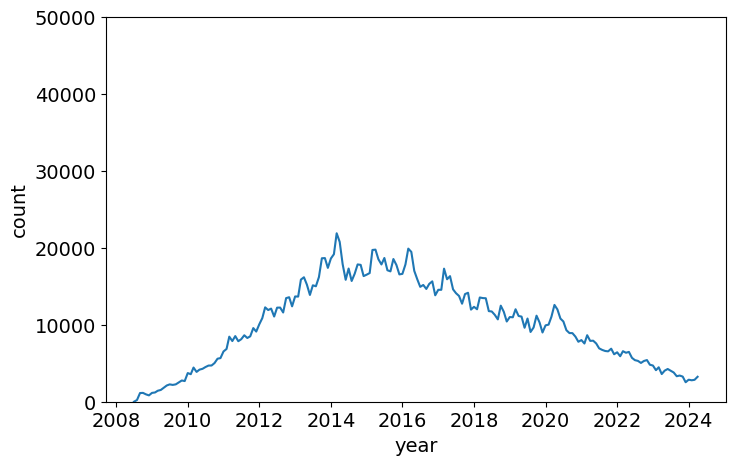

In [76]:
plt.figure(figsize=(8,5))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("year", fontsize = 14)
plt.ylabel("count",fontsize = 14)
plt.ylim(0,50000)
plt.plot(pivoted_df.index, pivoted_df["java"])


**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

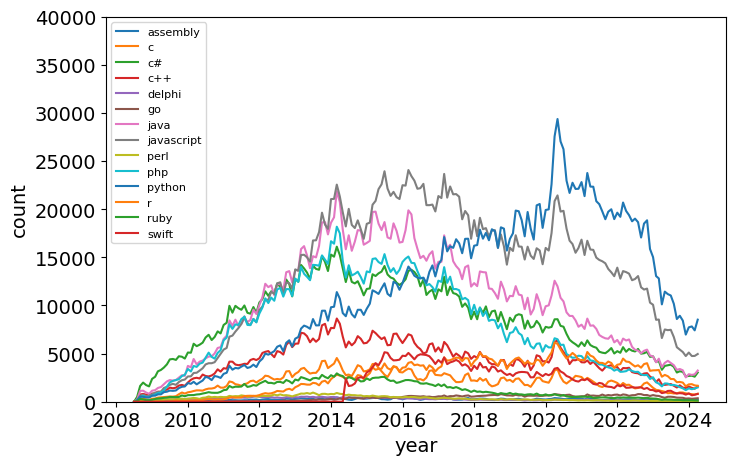

In [87]:
plt.figure(figsize=(8,5))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("year", fontsize = 14)
plt.ylabel("count",fontsize = 14)
plt.ylim(0,40000)
for column in pivoted_df.columns:
    plt.plot(pivoted_df.index, pivoted_df[column], label=column)
plt.legend(fontsize = 8)


# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [92]:
roll_df = pivoted_df.rolling(window=12).mean()

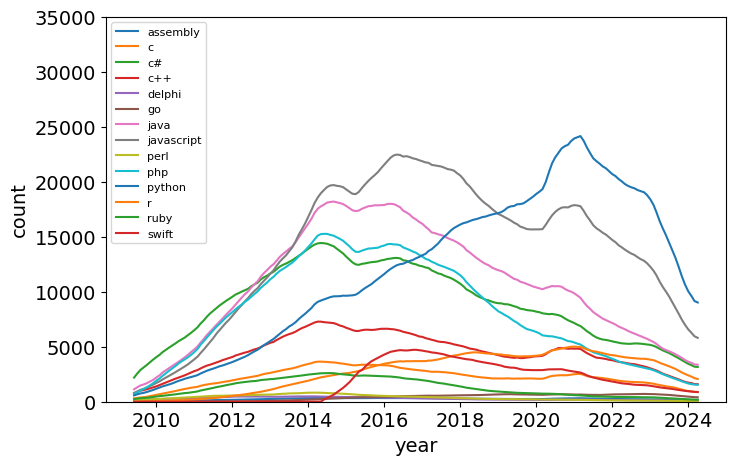

In [94]:

plt.figure(figsize=(8,5))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel("year", fontsize = 14)
plt.ylabel("count",fontsize = 14)
plt.ylim(0,35000)
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], label=column)
plt.legend(fontsize = 8)
